In [1]:
import os
import json
import matplotlib.pyplot as plt
import re

In [2]:
seed_setting = "all"
path = f"../data/Meta-Llama-3-8B-Instruct/generated_questions_from_{seed_setting}_seed.json"
save_path = f"../data/Meta-Llama-3-8B-Instruct/generated_questions_from_{seed_setting}_seed_filtered.json"

In [3]:
seed_path = "/data/syxu/culture_steering/data/wvs_questions.json"
with open(seed_path, 'r') as file:
    seed_questions = json.load(file)

In [4]:
with open(path, 'r') as file:
    questions = json.load(file)

In [5]:
seed_questions[0]

{'Q_id': 'Q1',
 'question': 'How important is family in your life?',
 'option_lst': ['Very important',
  'Rather important',
  'Not very important',
  'Not at all important']}

In [6]:
questions[0]

{'Q_id': 'Q0',
 'question': 'When encountering someone from a different cultural background, how willing are you to try to learn about and understand their customs and traditions?',
 'option_lst': ['Very willing',
  'Somewhat willing',
  'Not very willing',
  'Not at all willing'],
 'class': 'Social Values, Attitudes & Stereotypes',
 'prompt': 'Please come up with one new survey question.\nMake sure your question addresses the topic of Social Values, Attitudes & Stereotypes.\nFor reference, here are some example questions:\n#Example 1:\nQuestion: Do you agree that work should always come first, even if it means less spare time?\nOptions: [\'Agree strongly\', \'Agree\', \'Neither agree nor disagree\', \'Disagree\', \'Disagree strongly\']\n\n#Example 2:\nQuestion: Do you agree that when a mother works for pay, the children suffer?\nOptions: [\'Strongly agree\', \'Agree\', \'Disagree\', \'Strongly disagree\']\n\n#Example 3:\nQuestion: How important is religion in your life?\nOptions: [\'V

# check
- 重复
- 问题长度
- option：个数、数字

In [7]:
len(seed_questions)

291

In [8]:
all_questions = seed_questions + questions
all_questions_str = []

In [9]:
dup_q = []

for q in all_questions:
    q_str = q['question']
    if q_str not in all_questions_str:
        all_questions_str.append(q_str)
    else:
        dup_q.append(q)

In [10]:
# filter1
dup_q_id = [q['Q_id'] for q in dup_q] # to filter

In [11]:
new_questions = [q for q in all_questions if q['Q_id'] not in dup_q_id][len(seed_questions):]

In [12]:
all_length = [len(q['question']) for q in new_questions]

In [13]:
all_length[:10]

[150, 100, 159, 144, 160, 206, 98, 156, 153, 220]

In [14]:
len(all_length)

51037

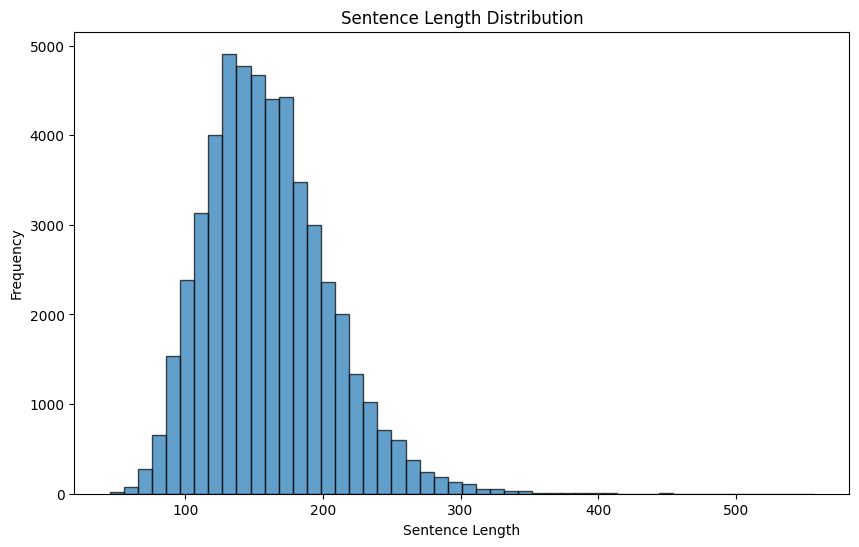

In [15]:
import matplotlib.pyplot as plt

# 绘制句子长度分布的直方图
plt.figure(figsize=(10, 6))
plt.hist(all_length, bins=50, edgecolor='black', alpha=0.7)

# 添加标题和标签
plt.title('Sentence Length Distribution')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')

# 显示图像
plt.show()

In [16]:
seed_length = [len(q["question"]) for q in seed_questions]

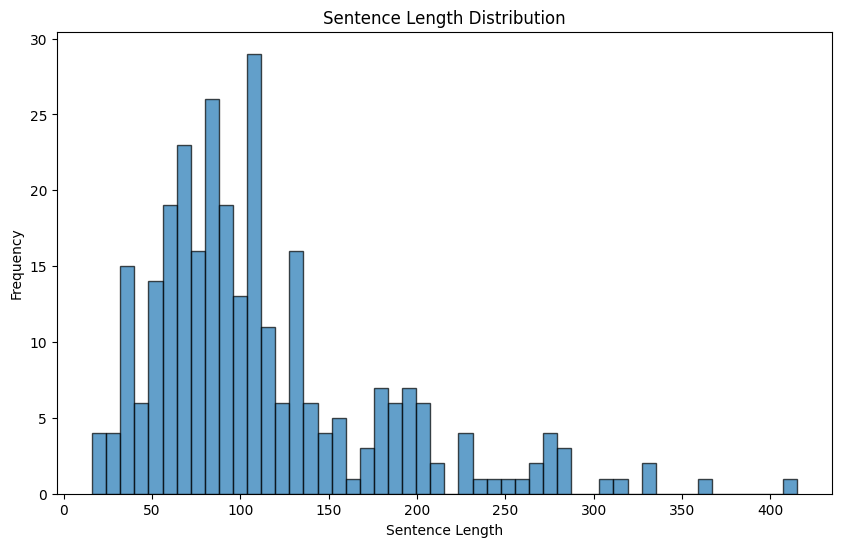

In [17]:
import matplotlib.pyplot as plt

# 绘制句子长度分布的直方图
plt.figure(figsize=(10, 6))
plt.hist(seed_length, bins=50, edgecolor='black', alpha=0.7)

# 添加标题和标签
plt.title('Sentence Length Distribution')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')

# 显示图像
plt.show()

In [18]:
option_num = [len(q['option_lst']) for q in new_questions]

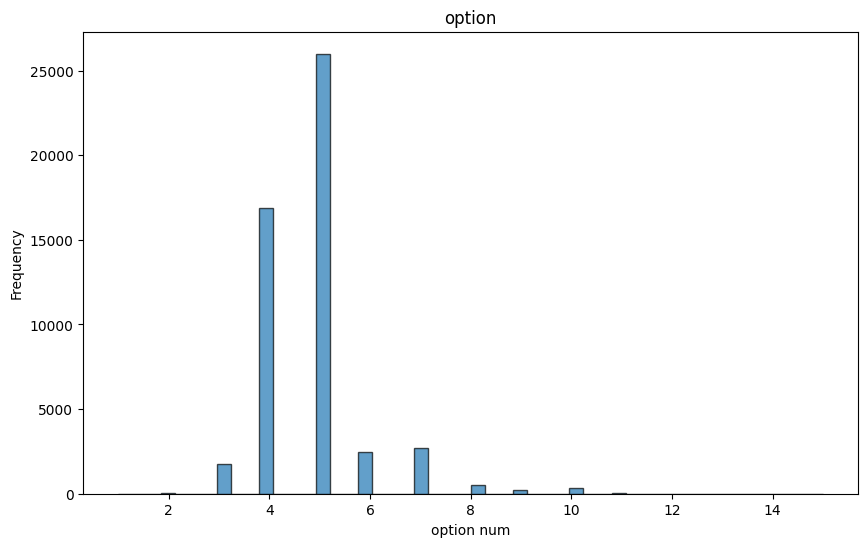

In [19]:

plt.figure(figsize=(10, 6))
plt.hist(option_num, bins=50, edgecolor='black', alpha=0.7)

# 添加标题和标签
plt.title('option')
plt.xlabel('option num')
plt.ylabel('Frequency')

# 显示图像
plt.show()

In [20]:
sum([True, True])

2

In [23]:
new_questions[0]

{'Q_id': 'Q0',
 'question': 'When encountering someone from a different cultural background, how willing are you to try to learn about and understand their customs and traditions?',
 'option_lst': ['Very willing',
  'Somewhat willing',
  'Not very willing',
  'Not at all willing'],
 'class': 'Social Values, Attitudes & Stereotypes',
 'prompt': 'Please come up with one new survey question.\nMake sure your question addresses the topic of Social Values, Attitudes & Stereotypes.\nFor reference, here are some example questions:\n#Example 1:\nQuestion: Do you agree that work should always come first, even if it means less spare time?\nOptions: [\'Agree strongly\', \'Agree\', \'Neither agree nor disagree\', \'Disagree\', \'Disagree strongly\']\n\n#Example 2:\nQuestion: Do you agree that when a mother works for pay, the children suffer?\nOptions: [\'Strongly agree\', \'Agree\', \'Disagree\', \'Strongly disagree\']\n\n#Example 3:\nQuestion: How important is religion in your life?\nOptions: [\'V

In [21]:
# 每一项都有数字：全是数字，不全是数字
q_option_with_num = []
q_id_option_with_num = []
q_option_with_num_only = []
q_id_option_with_num_only = []
for q in new_questions:
    option_lst = q["option_lst"]
    option_str = "".join(q["option_lst"])
    digit_num = [bool(re.search(r'^\d', option)) for option in option_lst]
    if sum(digit_num) == len(option_lst): # 每一项都有数字。如果不是，则是1-2 times a year这种。
        if option_str.isdigit(): # 每一项都有数字
            q_option_with_num_only.append(q)
            q_id_option_with_num_only.append(q["Q_id"])
        else: # 如果不是，则是1-2 times a year这种。
            q_option_with_num.append(q)
            q_id_option_with_num.append(q["Q_id"])

TypeError: sequence item 0: expected str instance, int found

In [22]:
# filter2
bad_q_id_with_num_only = []
for q in q_option_with_num_only:
    q_lower = q['question'].lower()
    if "on a scale" not in q_lower and "with 1 being" not in q_lower and "where 1 means" not in q_lower and "which 1 means" not in q_lower:
        # print(q['question'])
        bad_q_id_with_num_only.append(q["Q_id"])

In [48]:
len(new_questions)

12891

In [49]:
filter_questions1 = [q for q in new_questions if q['Q_id'] in bad_q_id_with_num_only]
new_questions = [q for q in new_questions if q['Q_id'] not in bad_q_id_with_num_only]

In [50]:
filter_questions1

[{'Q_id': 'Q3128',
  'question': "When considering the use of advanced technologies in the workplace, do you agree with the statement1 'The benefits of automation and artificial intelligence should be shared fairly among all stakeholders' or the statement2 'The pursuit of innovation and efficiency is more important than ensuring the well-being of workers'?",
  'option_lst': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
  'class': 'Economic Values',
  'prompt': 'Please come up with one new survey question.\nMake sure your question addresses the topic of Economic Values.\nFor reference, here are some example questions:\n#Example 1:\nQuestion: Do you agree with the statement1 \'Competition is good\' or the statement2 \'Competition is harmful\'? Using this card on which 1 means you agree completely with the \'statement1\' and 10 means you agree completely with the \'statement2\'\nOptions: [\'1\', \'2\', \'3\', \'4\', \'5\', \'6\', \'7\', \'8\', \'9\', \'10\']\n\n#Example 2:\nQuestio

In [288]:
len(new_questions)

12860

In [51]:
pattern = re.compile(r'^\d+(\s*[-.]\s*|\s*\(\s*|\s*\.\s*)[\s\S]*')
# pattern2 = re.compile(r'^\d+-\d+.*') # Q1879
match_lst = []
match_id_lst = []
no_match_lst = []
no_match_id_lst = []
for q in q_option_with_num:
    if q["Q_id"] == "Q1879":
        continue
    option_lst = q["option_lst"]
    matches = [bool(pattern.match(s)) for s in option_lst]
    if sum(matches) == len(option_lst):
        match_lst.append(q)
        match_id_lst.append(q["Q_id"])
    else:
        no_match_lst.append(q)
        no_match_id_lst.append(q["Q_id"])

In [290]:
match_lst[0]

{'Q_id': 'Q1036',
 'question': 'On a scale of 1-5, how often do you take time for self-reflection and contemplation, such as meditation, journaling, or simply being alone with your thoughts, to cultivate a sense of inner peace and fulfillment?',
 'option_lst': ['1 (Rarely or never)',
  '2 (Occasionally)',
  '3 (About half the time)',
  '4 (Often)',
  '5 (Almost always)'],
 'class': 'Happiness and Well-being',
 'prompt': 'Please come up with one new survey question.\nMake sure your question addresses the topic of Happiness and Well-being.\nFor reference, here are some example questions:\n#Example 1:\nQuestion: In the last 12 months, how often have you or your family felt unsafe from crime in your home?\nOptions: [\'Often\', \'Sometimes\', \'Rarely\', \'Never\']\n\n#Example 2:\nQuestion: Taking all things together, would you say you are very happy, rather happy, not very happy, or not at all happy?\nOptions: [\'Very happy\', \'Rather happy\', \'Not very happy\', \'Not at all happy\']\n\n

In [52]:
# match
def clean_string(s):
    # 匹配并去除前面的数字、标点、空格以及可能的括号
    cleaned = re.sub(r'^\d+(\s*[-.]\s*|\s*\(\s*|\s*\.\s*)', '', s)  # 去除数字和标点
    cleaned = cleaned.strip()
    if cleaned.endswith(")") and "(" not in cleaned:
        cleaned = cleaned[:-1]
    return cleaned
    
def match_function(q, q_id, match_id_lst):
    if q_id in match_id_lst:
        option_lst = q["option_lst"]
        new_option_lst = [clean_string(o) for o in option_lst]
        q['option_lst'] = new_option_lst
        print(q)
    return q

In [53]:
new_questions = [match_function(q, q['Q_id'], match_id_lst) for q in new_questions]

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [293]:
no_match_lst[1]

{'Q_id': 'Q1062',
 'question': "On a scale of 1 to 10, how much do you agree with the statement: 'I have the personal freedom to pursue my goals and aspirations without being held back by societal expectations or norms'? ",
 'option_lst': ['1 - Strongly disagree',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10 - Strongly agree'],
 'class': 'Happiness and Well-being',
 'prompt': 'Please come up with one new survey question.\nMake sure your question addresses the topic of Happiness and Well-being.\nFor reference, here are some example questions:\n#Example 1:\nQuestion: All in all, how would you describe your state of health these days? Would you say it is very good, good, fair, poor, or very poor?\nOptions: [\'Very good\', \'Good\', \'Fair\', \'Poor\', \'Very poor\']\n\n#Example 2:\nQuestion: How often do you make decisions that align with your personal values and principles, even if it means compromising your convenience or comfort?\nOptions: [\'Always\', \'Often\', \'Som

In [54]:
def no_match_function(q):
    pattern = re.compile(r'^(\d+)(\s*[-.]\s*|\s*\(\s*|\s*\.\s*)[\s\S]*')
    option_lst = q["option_lst"]
    matches = [bool(pattern.match(s)) for s in option_lst]
    if not (matches[0] == True and matches[-1] == True and sum(matches[1:-1]) == 0):
        return False
    s, e = clean_string(option_lst[0]), clean_string(option_lst[-1])
    if "refuse" in s.lower() or "refuse" in e.lower():
        return False
    s_id, e_id = pattern.match(option_lst[0]).group(1), pattern.match(option_lst[-1]).group(1)
    new_option = [s_id] + option_lst[1:-1] + [e_id]
    extra_prompt = f" Using this card on which {s_id} means '{s}' and {e_id} means '{e}'"
    return extra_prompt, new_option

In [55]:
final_questions = []
filter_question2 = []
for q in new_questions:
    if q["Q_id"] in no_match_id_lst:
        res = no_match_function(q)
        if res != False:
            extra_prompt, new_option = res
            q["question"] += extra_prompt
            option_lst = [o for o in new_option]
            q["option_lst"] = option_lst
            final_questions.append(q)
        else:
            filter_question2.append(q)
    else:
        final_questions.append(q)

In [92]:
topic = []

In [93]:
for q in final_questions:
    class_ = q['class']
    if class_ not in topic:
        if q["Q_id"] in ['Q1000', 'Q4000', 'Q3000', 'Q3001', 'Q3002','Q7000','Q7001','Q7002','Q7003']:
            continue
        print(q["Q_id"])
        print(q["class"])
        print(q["question"])
        print(','.join(q["option_lst"]))
        topic.append(class_)

Q0
Social Values, Attitudes & Stereotypes
When encountering someone from a different cultural background, how willing are you to try to learn about and understand their customs and traditions?
Very willing,Somewhat willing,Not very willing,Not at all willing
Q1001
Happiness and Well-being
When you think about the things that bring you joy and fulfillment, how often do you prioritize these aspects of your life over more practical considerations, such as work or financial security?
Almost never,Rarely,Sometimes,Often,Almost always
Q2000
Social Capital, Trust & Organizational Membership
How often do you trust that the decisions made by the organizations you are a member of align with your own values and goals?
Always,Mostly,Sometimes,Rarely,Never
Q3003
Economic Values
When considering the benefits and drawbacks of technological advancements in the workplace, how important is it to you that these changes lead to increased income inequality?
Not important at all,Somewhat unimportant,Neutral

In [57]:
filter_question2

[{'Q_id': 'Q1055',
  'question': 'On a scale from 0 to 10, how much do you feel a sense of purpose and direction in your daily life, considering your personal goals, values, and relationships?',
  'option_lst': ['0-2', '3-5', '6-7', '8-9', '10'],
  'class': 'Happiness and Well-being',
  'prompt': 'Please come up with one new survey question.\nMake sure your question addresses the topic of Happiness and Well-being.\nFor reference, here are some example questions:\n#Example 1:\nQuestion: In the last 12 months, how often have you or your family gone without a safe shelter over your head?\nOptions: [\'Often\', \'Sometimes\', \'Rarely\', \'Never\']\n\n#Example 2:\nQuestion: When you have a free day, how likely are you to engage in activities that bring you joy and fulfillment, such as hobbies, spending time with loved ones, or pursuing personal goals?\nOptions: [\'Not at all likely\', \'Somewhat likely\', \'Very likely\', \'Extremely likely\']\n\n#Example 3:\nQuestion: On a scale from 0 to 

In [299]:
with open(save_path, 'w', encoding='utf-8') as file:
    json.dump(final_questions, file, ensure_ascii=False, indent=4)